In [14]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('BTC-USD_day_yfin.csv')

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [16]:
df1['Price'] = df1['Adj Close']
df1 = df1.iloc[::-1]
df1['%change'] = ((df1['Adj Close']-df1['Adj Close'].shift(-1)) / df1['Adj Close'].shift(-1))*100
df2 = df1[['Date','%change']]

In [17]:
lag = 5
for i in range (1,lag+1):
    df2['%change_l'+str(i)] = df2['%change'][i:]
    df2['%change_l'+str(i)] = df2['%change_l'+str(i)].shift(-i)
df2 = df2.head(len(df2)-lag-1)


C:\Users\HuenCH\AppData\Local\Temp\ipykernel_13088\3920157956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%change_l'+str(i)] = df2['%change'][i:]
C:\Users\HuenCH\AppData\Local\Temp\ipykernel_13088\3920157956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%change_l'+str(i)] = df2['%change_l'+str(i)].shift(-i)
C:\Users\HuenCH\AppData\Local\Temp\ipykernel_13088\3920157956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [18]:
test = df2.head(365)
train = df2.tail(len(df2)-365)
x_test = test.drop(columns = ['Date', '%change'])
x_train = train.drop(columns = ['Date', '%change'])
y_test = test['%change']
y_train = train['%change']


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
grid = dict()
grid['max_depth'] = [2, 3, 5]
grid['min_samples_split'] = [1, 2, 3, 5]
grid['min_samples_leaf'] = [6, 10, 15]
grid['max_features'] = ['auto', 'sqrt']

cv = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv)
grid_result = grid_search.fit(x_train, y_train)

C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HuenCH\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

In [20]:
print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 5}


In [21]:
rf_reg_best = RandomForestRegressor(max_depth = 1, min_samples_leaf = 6,  min_samples_split = 5, max_features= 'sqrt')
rf_reg_best.fit(x_train,y_train)
preds = rf_reg_best.predict(x_test)

In [22]:
df4 = x_test
df4['Price'] = y_test
df4['Pred'] = preds
df4

,%change_l1,%change_l2,%change_l3,%change_l4,%change_l5,Price,Pred
2190,0.136582,-1.239690,-1.876028,2.169436,-2.505525,0.256862,0.090317
2189,-1.239690,-1.876028,2.169436,-2.505525,1.387906,0.136582,0.072296
2188,-1.876028,2.169436,-2.505525,1.387906,-1.653940,-1.239690,0.103288
2187,2.169436,-2.505525,1.387906,-1.653940,-0.587208,-1.876028,0.077106
2186,-2.505525,1.387906,-1.653940,-0.587208,0.293486,2.169436,0.092354
...,...,...,...,...,...,...,...
1830,1.099415,-0.051612,0.381295,0.468856,-0.331815,-0.157158,0.082884
1829,-0.051612,0.381295,0.468856,-0.331815,-0.238884,1.099415,0.076760
1828,0.381295,0.468856,-0.331815,-0.238884,0.542330,-0.051612,0.092354
1827,0.468856,-0.331815,-0.238884,0.542330,-0.984626,0.381295,0.082884


In [23]:
df1['Pred'] = df4['Pred']
df1['Pred_abs'] = df1['Price'].shift(-1)*(1+df4['Pred'])
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Price,%change,Pred,Pred_abs
2190,2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,16397498810,42265.187500,0.256862,0.090317,45964.373817
2189,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945,42156.902344,0.136582,0.072296,45143.040884
2188,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,42099.402344,-1.239690,0.103288,47030.817558
2187,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,42627.855469,-1.876028,0.077106,46792.566529
2186,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43442.855469,2.169436,0.092354,46447.351634
...,...,...,...,...,...,...,...,...,...,...,...
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,17429.500000,11.733293,NaN,NaN
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,15599.200195,2.619566,NaN,NaN
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,15201.000000,1.461080,NaN,NaN
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,14982.099609,9.701106,NaN,NaN


In [24]:
df5 = df1.head(365) 
sum((df5['Pred_abs']-df5['Price'])**2)/365


6919701.403821161

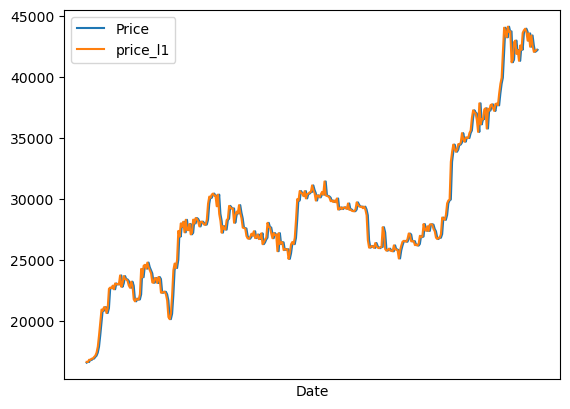

In [25]:
import matplotlib.pyplot as plt
df5 = df5.iloc[::-1]
df5["price_l1"] = df5['Price'].shift(-1)
df5.plot(x="Date", y=["Price","price_l1"])
plt.xticks([])
plt.show()

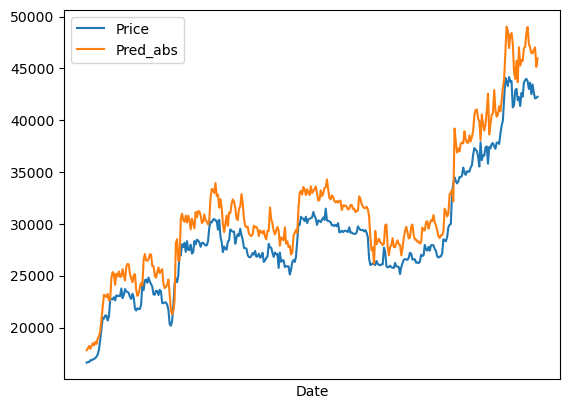

In [26]:
df5.plot(x="Date", y=["Price","Pred_abs"])
plt.xticks([])
plt.show()